In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Linear Regression Custom Class


In [39]:
class Linear_Regression:
  def __init__(self,learning_rate,no_of_iterations):#Initialize Hyperparameters
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):

    self.m,self.n=X.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    for i in range(self.no_of_iterations):
        self.update_weights()

  def update_weights(self):
      self.Y_pred=self.predict(self.X)

      #Compute gradients using Mean Squared Error (MSE) loss function
      dw = - (2 * (self.X.T).dot(self.Y - self.Y_pred)) / self.m
      db = - 2 * np.sum(self.Y - self.Y_pred) / self.m

      # Update weights and bias using Gradient Descent
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

  def predict(self,X):
      return X.dot(self.w) + self.b



In [40]:
salary_data = pd.read_csv("/content/salary_data.csv")

In [41]:
salary_data.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [42]:
salary_data.shape

(30, 2)

In [43]:
salary_data.isnull().sum()


,0
YearsExperience,0
Salary,0


In [44]:
X = salary_data.iloc[:, :-1].values  # Select all rows and all columns except the last (features)
Y = salary_data.iloc[:, -1].values   # Select all rows from the last column (target variable)


Traning Model

In [45]:
X_Train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)
print(X_Train.shape)

(20, 1)


In [46]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)  # Initialize model with hyperparameters


In [47]:
model.fit(X_Train,Y_train)

In [48]:
print("Weight: ", model.w[0])  # Represents salary increase per year of experience
print("Bias: ", model.b)       # Base salary when years of experience is zero


Weight:  9514.400999035135
Bias:  23697.406507136307


In [49]:
test_data_prediction = model.predict(X_test)

In [50]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


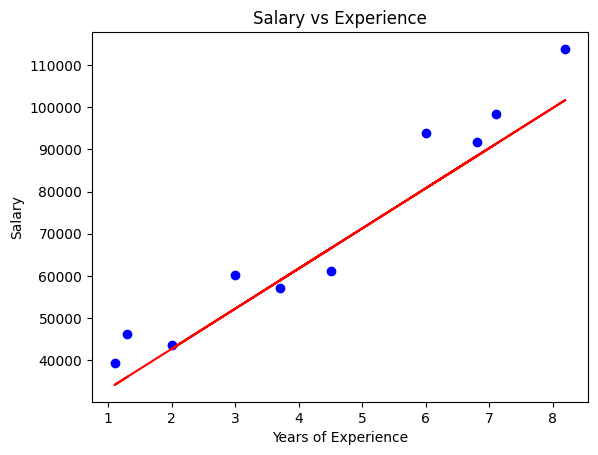

In [51]:
plt.scatter(X_test,Y_test,c="blue")
plt.plot(X_test,test_data_prediction,c="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()